<a href="https://colab.research.google.com/github/am9773-mb11/My-colab-project---decision-tree/blob/main/Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

from google.colab import files
uploaded = files.upload()   # click and select kaggle.json

Saving test_data.csv to test_data.csv


In [5]:
import pandas as pd
df = pd.read_csv('/content/test_data.csv')
print("Shape:", df.shape)
df.head()

Shape: (100, 17)


,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,791,792,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,792,793,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,793,794,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,794,795,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,795,796,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


In [6]:
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   100 non-null    int64  
 1   PassengerId  100 non-null    int64  
 2   Survived     100 non-null    int64  
 3   Sex          100 non-null    int64  
 4   Age          100 non-null    float64
 5   Fare         100 non-null    float64
 6   Pclass_1     100 non-null    int64  
 7   Pclass_2     100 non-null    int64  
 8   Pclass_3     100 non-null    int64  
 9   Family_size  100 non-null    float64
 10  Title_1      100 non-null    int64  
 11  Title_2      100 non-null    int64  
 12  Title_3      100 non-null    int64  
 13  Title_4      100 non-null    int64  
 14  Emb_1        100 non-null    int64  
 15  Emb_2        100 non-null    int64  
 16  Emb_3        100 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 13.4 KB
None

Missing values:
 Unnamed: 0     0
Passen

In [10]:

target = 'Survived'  # <-- change this
X = df.drop(columns=[target])
y = df[target]

In [11]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col].astype(str))
        X_test[col] = le.transform(X_test[col].astype(str))
    else:
        imputer = SimpleImputer(strategy='median')
        X_train[col] = imputer.fit_transform(X_train[[col]])
        X_test[col] = imputer.transform(X_test[[col]])

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.62      0.62      0.62         8

    accuracy                           0.70        20
   macro avg       0.69      0.69      0.69        20
weighted avg       0.70      0.70      0.70        20

Confusion Matrix:
 [[9 3]
 [3 5]]


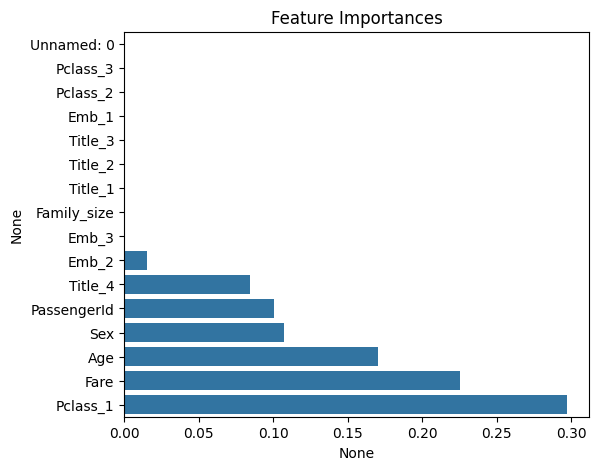

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values()
plt.figure(figsize=(6,5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importances")
plt.show()